<a href="https://colab.research.google.com/github/brayanramosc/room-occupancy-estimation/blob/feature%2Fdata_model/Room_Occupancy_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Room Occupancy Estimation

<a>https://archive.ics.uci.edu/dataset/864/room%2Boccupancy%2Bestimation</a>

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('/content/Occupancy_Estimation.csv')
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


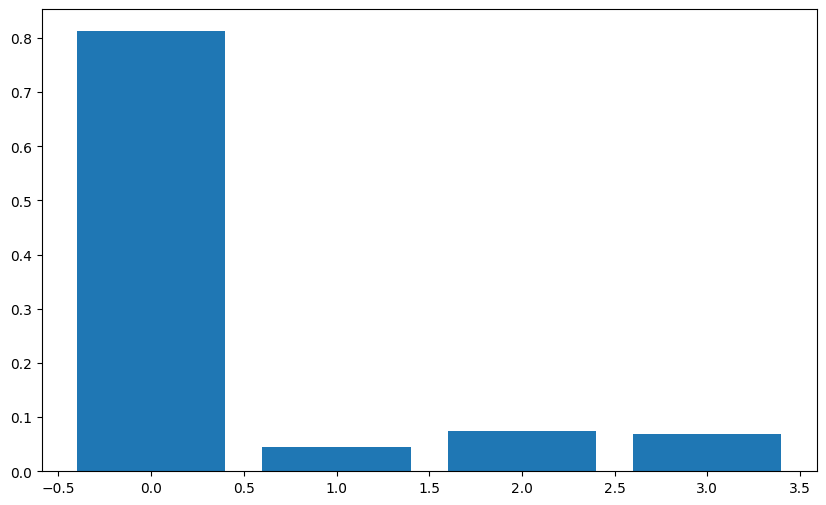

In [109]:
df_by_occupancy = df.groupby('Room_Occupancy_Count').count()
df_by_occupancy.index, df_by_occupancy.values.T[0]
plt.figure(figsize=(10,6))
plt.bar(df_by_occupancy.index, df_by_occupancy.values.T[0] / df.shape[0])
plt.show()

In [ ]:
df.shape

(10129, 19)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [19]:
X = df.drop(columns=['Date', 'Time', 'Room_Occupancy_Count'])
#X = X.iloc[:, 0:-1]
X

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0


In [11]:
y = df['Room_Occupancy_Count']
y

0        1
1        1
2        1
3        1
4        1
        ..
10124    0
10125    0
10126    0
10127    0
10128    0
Name: Room_Occupancy_Count, Length: 10129, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
rf_model = RandomForestClassifier(max_depth=4, random_state=0, n_jobs=-1)

In [112]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=0)

[Text(0.5, 0.9, 'x[4] <= 92.0\ngini = 0.334\nsamples = 4451\nvalue = [5728, 321, 529, 512]'),
 Text(0.29545454545454547, 0.7, 'x[13] <= 0.473\ngini = 0.044\nsamples = 3691\nvalue = [5728, 0, 0, 133]'),
 Text(0.18181818181818182, 0.5, 'x[15] <= 0.5\ngini = 0.006\nsamples = 3597\nvalue = [5694, 0, 0, 18]'),
 Text(0.09090909090909091, 0.3, 'x[13] <= 0.19\ngini = 0.001\nsamples = 3587\nvalue = [5691, 0, 0, 3]'),
 Text(0.045454545454545456, 0.1, 'gini = 0.001\nsamples = 3555\nvalue = [5643, 0, 0, 2]'),
 Text(0.13636363636363635, 0.1, 'gini = 0.04\nsamples = 32\nvalue = [48, 0, 0, 1]'),
 Text(0.2727272727272727, 0.3, 'x[3] <= 25.97\ngini = 0.278\nsamples = 10\nvalue = [3, 0, 0, 15]'),
 Text(0.22727272727272727, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 15]'),
 Text(0.3181818181818182, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.4090909090909091, 0.5, 'x[0] <= 25.91\ngini = 0.352\nsamples = 94\nvalue = [34, 0, 0, 115]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.0\ns

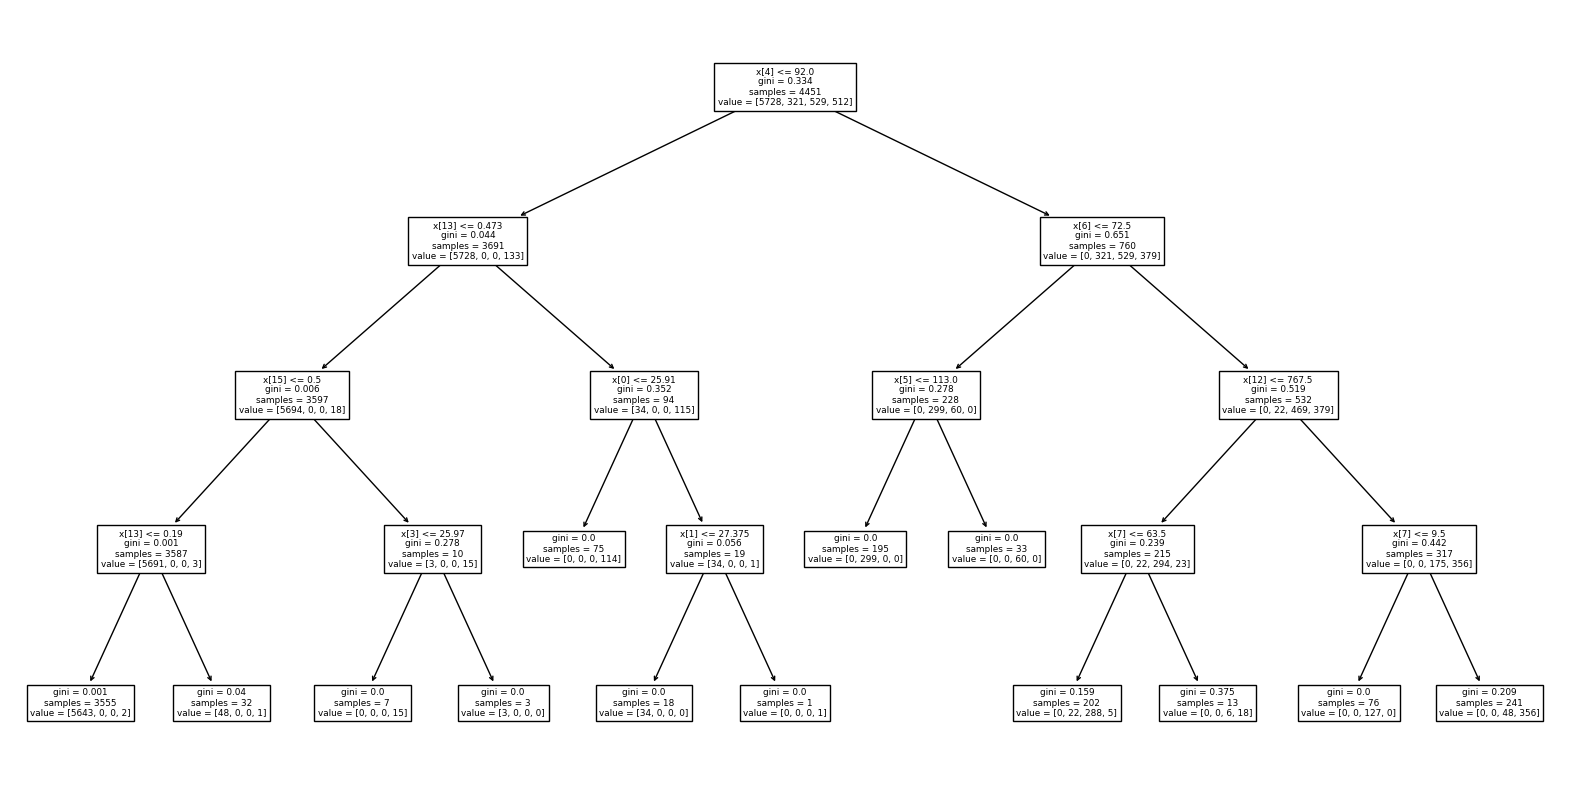

In [113]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(rf_model.estimators_[0])

In [114]:
rf_model.score(X_test, y_test)

0.9940769990128332

In [115]:
from sklearn.metrics import f1_score

In [116]:
f1_score(y_test, rf_model.predict(X_test), average=None)

array([0.99898063, 0.996633  , 0.97286013, 0.95717884])

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
scores = cross_val_score(rf_model, X, y, cv=5)
scores

array([0.94768016, 0.99259625, 0.98321816, 0.97384008, 0.91012346])

In [119]:
from sklearn.metrics import confusion_matrix

In [122]:
confusion_matrix(y_test, rf_model.predict(X_test))

array([[2450,    0,    0,    1],
       [   0,  148,    0,    0],
       [   0,    1,  233,   10],
       [   4,    0,    2,  190]])